## Part 3 - PreProcessing & LDA Modeling w/ SkLearn

In this notebook, we will begin to do some NLP preprocessing as well as inputing our text data into a vectorizer. We need do this before we can start to do some modeling, specifcally LDA Topic Modeling.

In [1]:
#Importing the holy trinity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing NLP plugins
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

#Import our TfidFVectorizer plugin
from sklearn.feature_extraction.text import TfidfVectorizer

# We don't need to see the warnings :) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing our cleaned data for later use:
df = pd.read_csv('data/cleaned_df.csv')
df = df.drop('Unnamed: 0', axis = 1)
df.head(3)

,Title,Text,Source
0,Latest Headlines on CNN Business,Disney+ is almost near its subscribers goal fo...,CNN
1,Travel News - CNN,Here are all the animal livestreams and videos...,CNN
2,Rugby World Cup 2019,"By Daniel Gallan, for CNN\r\n\r\nNew Zealand e...",CNN


#### Let us create some helper function to ease our workflow

In [3]:
stop_words = stopwords.words('english')
#Adds cnn to the stop_words list above
stop_words.extend(["cnn","n't"])

def tokenizer(text):
    '''
    Simple tokenizer:
    1.) Removes stopwords
    2.) Use PorterStemmer
    '''
    
    #Split each word up in text, which is a long string of words. 
    #These words are called tokens
    
    list_of_tokens = text.split(' ')
    
    #Let us use a stemmer
    stemmer = PorterStemmer()
    
    #list of cleaned_tokens
    cleaned_tokens = []

    #Remove Stopwords
    for token in list_of_tokens:
        if (not token in stop_words):
            # Stemm words
            token_stemmed = stemmer.stem(token)
                
            cleaned_tokens.append(token_stemmed)
            
    return cleaned_tokens

Now that we created our tokenizer function which will be fed into our TFIDF vectorizer down below, ideally I want to optimize the min_df value of our tokenizer. The **min_df** used for removing terms that appear too infrequently.

For example:
* min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
* min_df = 5 means "ignore terms that appear in less than 5 documents".

In [16]:
%%time
#Initate min_df step range for our tfidf vectorizer below
min_df_range = range(100, 1800, 200)
num_tokens_list = []

for i in min_df_range:
    #Intatiate the model
    tf = TfidfVectorizer(tokenizer = tokenizer, min_df = i, ngram_range =(1,3))
    print('instaiate')
    #Fit on the corpus
    tf.fit(df['Text'])
    print('fit')
    #Transform the model
    num_tokens = tf.transform(df['Text'])
    print('transform')
    #Extract and count:
    count_tokens = pd.DataFrame(columns = tf.get_feature_names(), data = num_tokens.toarray())
    #min_df_tokens = tf()
    print(f'Vectorization for min_df = {i} excuted.')
    
    num_tokens_list.append(count_tokens.shape[1])

instaiate
fit
transform
Vectorization for min_df = 100 excuted.
instaiate
fit
transform
Vectorization for min_df = 300 excuted.
instaiate
fit
transform
Vectorization for min_df = 500 excuted.
instaiate
fit
transform
Vectorization for min_df = 700 excuted.
instaiate
fit
transform
Vectorization for min_df = 900 excuted.
instaiate
fit
transform
Vectorization for min_df = 1100 excuted.
instaiate
fit
transform
Vectorization for min_df = 1300 excuted.
instaiate
fit
transform
Vectorization for min_df = 1500 excuted.
instaiate
fit
transform
Vectorization for min_df = 1700 excuted.
CPU times: user 14min 16s, sys: 10.9 s, total: 14min 27s
Wall time: 14min 39s


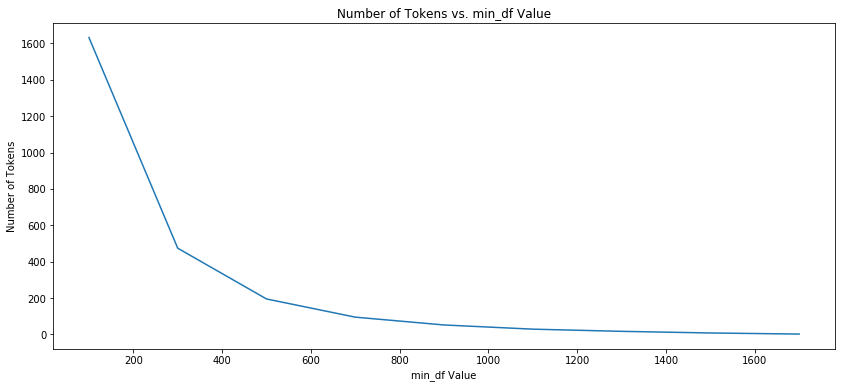

In [21]:
#Lets PLot this
plt.figure(figsize = (14, 6))
plt.plot(min_df_range, num_tokens_list)
plt.title('Number of Tokens vs. min_df Value')
plt.xlabel('min_df Value')
plt.ylabel('Number of Tokens')
plt.show()

It seems to level off between 300 to 600 with the min_df value. So I guess Ill try to keep atleast 1000 tokens, so I will pick a min_df at around 250.

#### Now let's press on with our selected TFIDF model. 

In [26]:
#Instatiate TFIDF model
tf_final = TfidfVectorizer(tokenizer = tokenizer, min_df = 250, ngram_range = (1,3), lowercase = True)
#Fit & the data
tokens_tfidf_matrix = tf_final.fit_transform(df['Text'])


## LDA Topic Modelling with 2 Topics: Sklearn LDA vs. Gensim LDA

I'll be initating two lda topic models, with 20 topics each. I will complete this with Sklearn's version and Gensim's version. Ideally, they should produce similar results, but let's see if there is any interesting insights we could garner between both models.


#### Sklearn LDA

In [31]:
#Import our sklearn LDA model
from sklearn.decomposition import LatentDirichletAllocation as LDA

#Import visualization tools for LDA models
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


In [30]:
# I want 20 topics generated
num_topics = 20

# Instatiate LDA model
lda = LDA(n_components = num_topics, n_jobs = -1)
lda.fit(tokens_tfidf_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [32]:
# Let us visualize these topics
pyLDAvis.sklearn.prepare(lda, tokens_tfidf_matrix, tf_final)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.036170  0.013686       1        1  45.468977
13    -0.012674  0.007325       2        1  33.794837
10    -0.045645 -0.010381       3        1   5.540306
3      0.003657 -0.010514       4        1   3.904947
19     0.369537  0.038821       5        1   0.974562
5      0.033458 -0.293450       6        1   0.899336
14     0.024049  0.063296       7        1   0.893113
0     -0.061550  0.081412       8        1   0.870653
9      0.020059  0.046493       9        1   0.730337
11    -0.039419  0.017310      10        1   0.665604
6     -0.033089  0.006811      11        1   0.646411
15    -0.018445  0.017528      12        1   0.643244
2     -0.026949  0.013842      13        1   0.637335
1     -0.027762  0.003022      14        1   0.636249
18    -0.030791  0.004444      15        1   0.623075
7     -0.030489 -0.003993      16        1   0.620742
4     -0.027067 -0.006780      17        1   0.618375
16    -0.030237  0.008056      18        1   0.615534
17    -0.022320  0.002182      19        1   0.613191
12    -0.008152  0.000890      20        1   0.603171, topic_info=           Term        Freq       Total Category  logprob  loglift
125          de  157.000000  157.000000  Default  30.0000  30.0000
91          cnn   63.000000   63.000000  Default  29.0000  29.0000
571       trump   88.000000   88.000000  Default  28.0000  28.0000
107  coronaviru  128.000000  128.000000  Default  27.0000  27.0000
2            --   85.000000   85.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
404       point    0.188445   35.813783  Topic20  -6.6186  -0.1366
251        imag    0.188445   39.037500  Topic20  -6.6186  -0.2227
135      design    0.188445   39.188660  Topic20  -6.6186  -0.2266
254      import    0.188445   35.583441  Topic20  -6.6186  -0.1301
558        time    0.188445   88.816518  Topic20  -6.6186  -1.0448

[814 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.328112  (cnn)
0         2  0.184563  (cnn)
0         4  0.102535  (cnn)
0        11  0.328112  (cnn)
2         1  0.669708     --
...     ...       ...    ...
623       1  0.552075      —
623       2  0.398721      —
623       3  0.015335      —
623       4  0.015335      —
623       5  0.007668      —

[1834 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 14, 11, 4, 20, 6, 15, 1, 10, 12, 7, 16, 3, 2, 19, 8, 5, 17, 18, 13])

Wow, it doesn't look like my data is very good, most of the clusters are in one spot! Yikes! 

**Many Reason's why the LDA topic model din't do too well**
1. Not enough data
2. Not enough variety of data sources
3. Did not do a thorough job on cleaning/preprocessing the text data itself.

Let's export this and see if Gensim could do better job, before that let me dump this model to a pkl file. 

In [39]:
import joblib
#Saving model
joblib.dump(lda, 'lda_models/sk_lda_20_20200409.pkl')

['lda_models/sk_lda_20_20200409.pkl']

In [40]:
#Saving LDA Visulization
pyLDAvis.save_html(data = (pyLDAvis.sklearn.prepare(lda, tokens_tfidf_matrix, tf_final)), fileobj = 'lda_models/sk_lda+_viz_20_20200409.html')

#### Gensim LDA

In [44]:
# Gensim's LDA Topic Modeling Plugins
import gensim
from gensim.models import LdaModel as gensim_lda
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# Display formater
import pprint

#Import visualization tools for LDA models
import pyLDAvis.gensim

#Filter DeprecationWarnings
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [45]:
lda_gensim = gensim_lda(num_topics = 20, corpus = tokens_tfidf_matrix, id2word = tf_final)

TypeError: object of type 'TfidfVectorizer' has no len()